# Graylevel Co-Ocurrence Matrix (GLCM)

## 1.1 Cálculo da matriz GLCM

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def glcm(img, shift, num_levels):
    '''Calcula a matriz GLCM de uma imagem de entrada img. O parâmetro shift
       indica o deslocamento utilizado para comparar os pixels. Por exemplo,
       shift=(1,2) indica que cada pixel será relacionado com o pixel da linha
       de baixo e duas colunas para a direita. O parâmetro num_levels indica
       o número de níveis de intensidades desejados (tamanho da matriz GLCM)'''
    
    glcm_matrix = np.zeros((num_levels, num_levels))
    
    num_rows, num_cols = img.shape
    for row in range(num_rows):
        for col in range(num_cols):
            reference_value = img[row, col]
            row_shift = row+shift[0]
            col_shift = col+shift[1]
            if row_shift>=0 and row_shift<num_rows and \
                        col_shift>=0 and col_shift<num_cols:
                neighbor_value = img[row_shift, col_shift]
                glcm_matrix[reference_value, neighbor_value] += 1
            
    # Normaliza valores da matrix, de forma que a soma seja 1. Com isso,
    # os valores da matrix podem ser entendidos como probabilidades. Mas lembre-se
    # que os valores continuam sendo basicamente uma contagem, só que divididos por 
    # um valor constante
    glcm_matrix = glcm_matrix/np.sum(glcm_matrix)        
    
    return glcm_matrix

## 1.2 Testes de cálculo da matriz GLCM

In [33]:
img = np.array([[0, 1, 1, 4],
                [3, 2, 2, 1],
                [3, 2, 3, 2],
                [4, 2, 1, 1]])
glcm_mat = glcm(img, (0, 1), 5)

print(glcm_mat)
# Imprime matriz não normalizada:
print(glcm_mat*(4*3))

[[0.         0.08333333 0.         0.         0.        ]
 [0.         0.16666667 0.         0.         0.08333333]
 [0.         0.16666667 0.08333333 0.08333333 0.        ]
 [0.         0.         0.25       0.         0.        ]
 [0.         0.         0.08333333 0.         0.        ]]
[[0. 1. 0. 0. 0.]
 [0. 2. 0. 0. 1.]
 [0. 2. 1. 1. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [34]:
def plot_data(img, glcm_mat):

    plt.figure(figsize=[10,5])
    plt.subplot(1, 2, 1)
    plt.imshow(img, 'gray')
    plt.subplot(1, 2, 2)
    plt.imshow(glcm_mat, 'gray')

[[0.  0.  0.  ... 0.  0.  0.5]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.5 0.  0.  ... 0.  0.  0. ]]


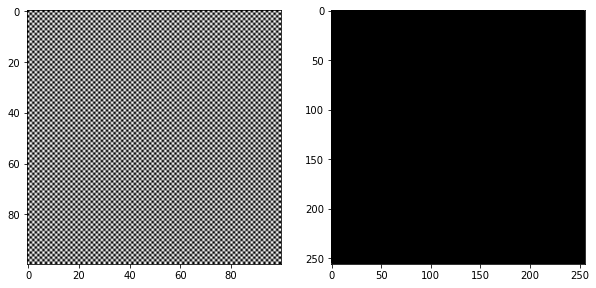

In [35]:
img = plt.imread('checkerboard.tiff')
glcm_mat = glcm(img, (0, 1), 256)
print(glcm_mat)
plot_data(img, glcm_mat)

Note que os únicos valores não nulos da matriz glcm da imagem checkerboard estão nas posições (0, 255) e (255, 0)

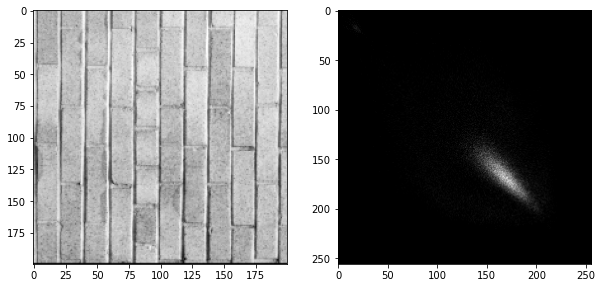

In [36]:
img = plt.imread('bricks.tiff')
glcm_mat = glcm(img, (0, 1), 256)

plot_data(img, glcm_mat)

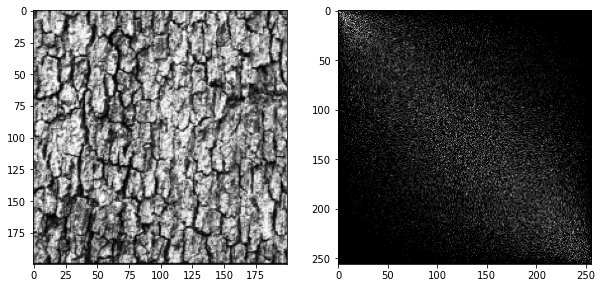

In [37]:
img = plt.imread('tree.tiff')
glcm_mat = glcm(img, (0, 1), 256)

plot_data(img, glcm_mat)

## 1.3 GLCM implementada utilizando numpy

In [38]:
import collections

def glcm_numpy(img, shift, num_levels):
    '''Calcula a matriz GLCM de uma imagem de entrada img utilizando funcionalidades
       da bibliotecas numpy. O parâmetro shift indica o deslocamento utilizado para 
       comparar os pixels. Por exemplo, shift=(1,2) indica que cada pixel será relacionado 
       com o pixel da linha de baixo e duas colunas para a direita. O parâmetro num_levels 
       indica o número de níveis de intensidades desejados (tamanho da matriz GLCM)'''
        
    num_rows, num_cols = img.shape
    
    # Cria arrays contendo os índices de todos os pontos da imagem, e 
    # também arrays com os índices dos pontos transladados 
    rr, cc = np.meshgrid(range(num_rows), range(num_cols), indexing='ij')
    rr = rr.flatten()
    cc = cc.flatten()
    rr_shift = rr + shift[0]
    cc_shift = cc + shift[1]
    
    # Mantém apenas índices que estão dentro da imagem
    valid_indices = np.nonzero((rr_shift>=0) & (rr_shift<num_rows) \
                               & (cc_shift>0) & (cc_shift<num_cols))
    rr = rr[valid_indices]
    cc = cc[valid_indices]
    rr_shift = rr_shift[valid_indices]
    cc_shift = cc_shift[valid_indices]
    
    # Valores da imagem em cada índice
    reference_values = img[rr, cc]
    neighbor_values = img[rr_shift, cc_shift]
    
    # Conta o número de ocorrências de cada tupla (x, y), onde
    # x é o valor do pixel referência e y o valor do pixel vizinho
    counter = collections.Counter(zip(reference_values, neighbor_values))
    
    # Separa os itens do contador. keys possui as tuplas (x, y) contendo
    # os pares de níveis de intensidade e values possui a contagem
    keys, values = zip(*counter.items())
    
    glcm_matrix = np.zeros((num_levels, num_levels))
    
    # Separa as tuplas em duas listas contendo linhas e colunas
    rows, cols = zip(*keys)
    glcm_matrix[rows, cols] = values
    glcm_matrix = glcm_matrix/np.sum(glcm_matrix)
            
    return glcm_matrix

In [39]:
img = plt.imread('tree.tiff')
glcm_mat_numpy = glcm_numpy(img, (0, 1), 256)
glcm_mat = glcm(img, (0, 1), 256)

np.allclose(glcm_mat_numpy, glcm_mat)  # Verifica se todos os valores dos dois arrays são parecidos

True

## 2. Cálculo de propriedades da GLCM

In [40]:
def glcm_properties(glcm_mat):
    '''Calcula algumas propriedades da matriz GLCM de entrada glcm_mat'''
    
    num_rows, num_cols = glcm_mat.shape

    contrast = 0
    uniformity = 0
    homogeneity = 0
    entropy = 0
    for row in range(num_rows):
        for col in range(num_cols):
            contrast += (row-col)**2*glcm_mat[row, col]
            uniformity += glcm_mat[row, col]**2
            homogeneity += (glcm_mat[row, col]/(1+abs(row-col)))
            
            if glcm_mat[row, col]!=0:
                entropy += glcm_mat[row, col]*np.log2(glcm_mat[row, col])
    entropy *= -1
    
    return contrast, uniformity, homogeneity, entropy

In [41]:
def glcm_properties_numpy(glcm_mat):
    '''Calcula algumas propriedades da matriz GLCM de entrada glcm_mat, 
       utilizando funcionalidades da biblioteca numpy.'''
    
    num_levels = glcm_mat.shape[0]
    levels = np.arange(num_levels)
    
    # Cria arrays contendo os índices de todos os pontos da GLCM
    rr, cc = np.meshgrid(levels, levels, indexing='ij')
    rr = rr.flatten()
    cc = cc.flatten()

    contrast = np.sum((rr-cc)**2*glcm_mat[rr, cc])
    uniformity = np.sum(glcm_mat**2)
    homogeneity = np.sum(glcm_mat[rr, cc]/(1+np.abs(rr-cc)))
    ind_nonzero = np.nonzero(glcm_mat>0)
    entropy = -np.sum(glcm_mat[ind_nonzero]*np.log2(glcm_mat[ind_nonzero]))
    
    return contrast, uniformity, homogeneity, entropy    

In [42]:
img = plt.imread('tree.tiff')
glcm_mat = glcm(img, (0, 10), 256)

props = glcm_properties(glcm_mat)
print(props)

(8343.029578947371, 4.3380886426583483e-05, 0.03974601940128357, 14.648260504938802)


In [43]:
img = plt.imread('bricks.tiff')
glcm_mat = glcm(img, (0, 10), 256)

props = glcm_properties(glcm_mat)
print(props)

(1294.1240789473454, 0.0002053947368420957, 0.11096215022273824, 12.786229425371166)


#### Cálculo da matriz GLCM dada uma distância (escala) e um ângulo

In [44]:
def glcm_from_dist_and_angle(img, dist, angle, num_levels):
    '''Calcula a matriz GLCM utilizando como parâmetro a distância
       ao pixel de referência e o ângulo de comparação. Esses dois
       parâmetros são utilizados para definir o deslocamente (shift)
       e chamar a função GLCM'''
    
    col = dist*np.cos(angle)
    row = -dist*np.sin(angle)
    col = int(np.round(col))
    row = int(np.round(row))
    
    shift = (row, col)
    glcm_mat = glcm(img, shift, num_levels)
    
    return glcm_mat

# 3. Segmentação de imagens utilizando GLCM

## 3.1 Cálculo da GLCM por região

In [45]:
def grid_img(img, window_size, shift, num_levels):
    '''Divide a imagem em diferentes regiões, e calcula propriedades
       da matriz GLCM de cada região. window_size ajusta o tamanho das
       subregiões a serem utilizadas, e shift e num_levels são parâmetros
       da GLCM.'''
    
    num_rows, num_cols = img.shape
    num_windows_rows = int(num_rows/window_size)
    num_windows_cols = int(num_cols/window_size)
    
    contrast_img = np.zeros((num_windows_rows, num_windows_cols))
    uniformity_img = np.zeros((num_windows_rows, num_windows_cols))
    homogeneity_img = np.zeros((num_windows_rows, num_windows_cols))
    entropy_img = np.zeros((num_windows_rows, num_windows_cols))
    for window_row in range(num_windows_rows):
        print(window_row)
        first_row = window_size*window_row
        last_row = first_row + window_size        
        for window_col in range(num_windows_cols):
            first_col = window_size*window_col
            last_col = first_col + window_size
            
            img_patch = img[first_row:last_row, first_col:last_col]
            
            glcm_patch = glcm_numpy(img_patch, shift, num_levels)
            props = glcm_properties_numpy(glcm_patch)
            contrast, uniformity, homogeneity, entropy = props
            contrast_img[window_row, window_col] = contrast
            uniformity_img[window_row, window_col] = uniformity
            homogeneity_img[window_row, window_col] = homogeneity
            entropy_img[window_row, window_col] = entropy
            
    return contrast_img, uniformity_img, homogeneity_img, entropy_img

0
1
2
3
4
5
6
7


Text(0.5, 1.0, 'Entropia')

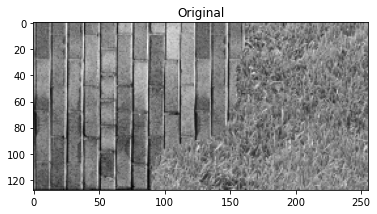

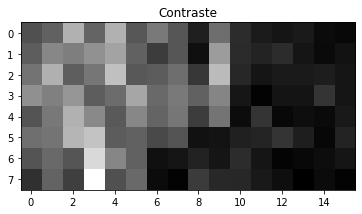

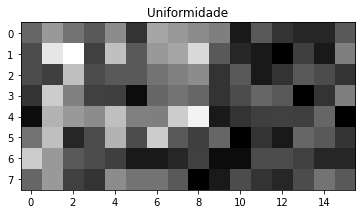

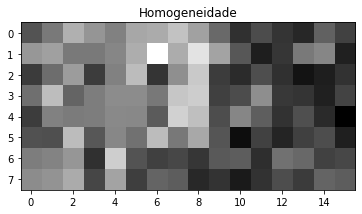

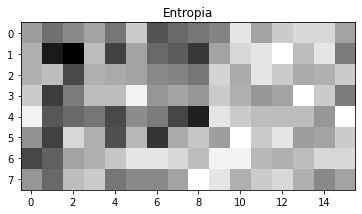

In [46]:
img = plt.imread('grick.tiff')
import scipy.ndimage as ndi
img_props = grid_img(img, 16, (0, 1), 256)
contrast_img, uniformity_img, homogeneity_img, entropy_img = img_props

plt.figure()
plt.imshow(img, 'gray')
plt.title('Original')
plt.figure()
plt.imshow(contrast_img, 'gray')
plt.title('Contraste')
plt.figure()
plt.imshow(uniformity_img, 'gray')
plt.title('Uniformidade')
plt.figure()
plt.imshow(homogeneity_img, 'gray')
plt.title('Homogeneidade')
plt.figure()
plt.imshow(entropy_img, 'gray')
plt.title('Entropia')

## 3.2 Segmenção da imagem utilizando textura

Vemos no resultado acima que a propriedade de contraste parece separar bem as regiões, então utilizaremos essa propriedade na segmentação.

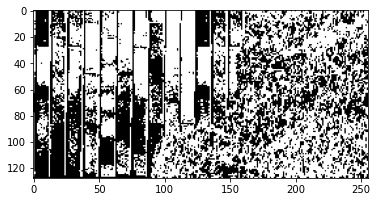

In [47]:
# Teste com limiarização de intensidade, resultado ruim!
threshold = 90
plt.imshow(img>threshold, 'gray')

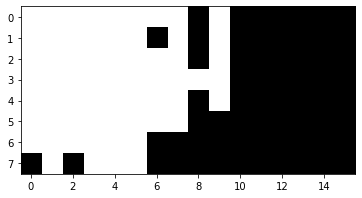

In [48]:
# Teste com limiarização de valor de contraste da GLCM, resultado razoável!
threshold_contrast = 700
plt.imshow(contrast_img>threshold_contrast, 'gray')

Vemos que a imagem binária resultante parece segmentar bem as duas regiões da imagem, mas essa imagem possui um tamanho menor do que a imagem original. Abaixo definimos uma função para gerar uma máscara binária de mesmo tamanho que a imagem original.

In [49]:
def create_mask(feature_mask, img_shape, window_size):
    '''Dada uma máscara binária, indicada em feature_mask, cria uma nova máscara
    de mesmo tamanho que a imagem original. O tamanho da imagem original é dado
    por img_shape e o tamanho da janela utilizado na análise por regiões é indicado
    em window_size'''
       
    num_rows, num_cols = img_shape
    mask = np.zeros(img_shape)
    num_windows_rows = int(num_rows/window_size)
    num_windows_cols = int(num_cols/window_size)
    
    for window_row in range(num_windows_rows):
        first_row = window_size*window_row
        last_row = first_row + window_size        
        for window_col in range(num_windows_cols):
            first_col = window_size*window_col
            last_col = first_col + window_size
            
            mask_val = feature_mask[window_row, window_col]
            mask[first_row:last_row, first_col:last_col] = mask_val
            
    return mask

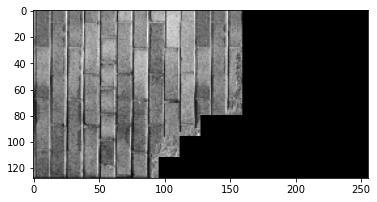

In [50]:
# Limiarização da imagem de contraste e fechamento morfológico
feature_mask = contrast_img>700
feature_mask_dil = ndi.binary_dilation(feature_mask, iterations=1)
feature_mask_closed = ndi.binary_erosion(feature_mask_dil, iterations=1, 
                                                         border_value=1)
mask = create_mask(feature_mask_closed, img.shape, 16)

img_brick = mask*img
plt.imshow(img_brick, 'gray')
  